In [ ]:
from google.colab import files
upload = files.upload ()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df = df.drop("customerID", axis=1)


In [ ]:
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


/tmp/ipython-input-4226307296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [ ]:
df.replace({'Yes':1, 'No':0}, inplace=True)

/tmp/ipython-input-241966483.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes':1, 'No':0}, inplace=True)


In [ ]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
print(df.head())
print(df.info())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_No internet service  StreamingTV_1  \
0                            False          False   
1                            False          False   
2                      

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


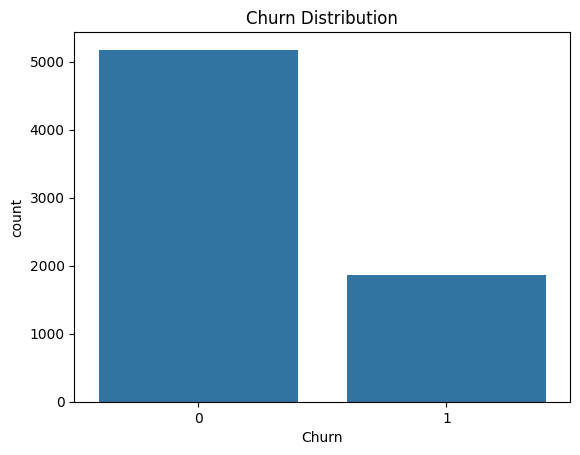

In [ ]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


In [ ]:
sns.countplot(x="Contract_Month-to-month", hue="Churn", data=df)
plt.title("Churn by Contract Type (Month-to-Month vs Others)")
plt.show()


ValueError: Could not interpret value `Contract_Month-to-month` for `x`. An entry with this name does not appear in `data`.

In [ ]:
df.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_1', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_1', 'OnlineSecurity_No internet service',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_1', 'DeviceProtection_No internet service',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1',
       'StreamingTV_No internet service', 'StreamingMovies_1',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

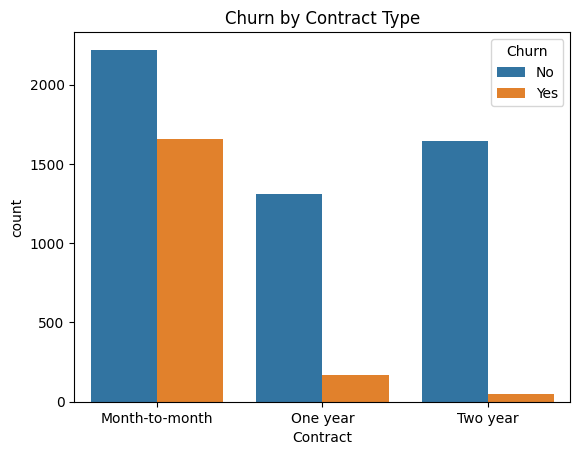

In [ ]:
df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

sns.countplot(x="Contract", hue="Churn", data=df_raw)
plt.title("Churn by Contract Type")
plt.show()


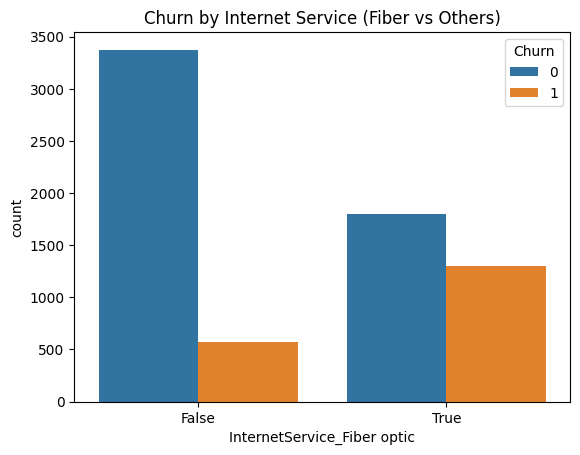

In [ ]:
sns.countplot(x="InternetService_Fiber optic", hue="Churn", data=df)
plt.title("Churn by Internet Service (Fiber vs Others)")
plt.show()


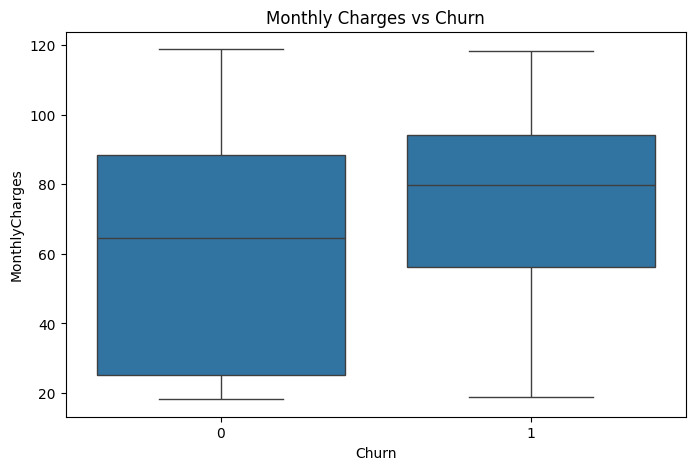

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


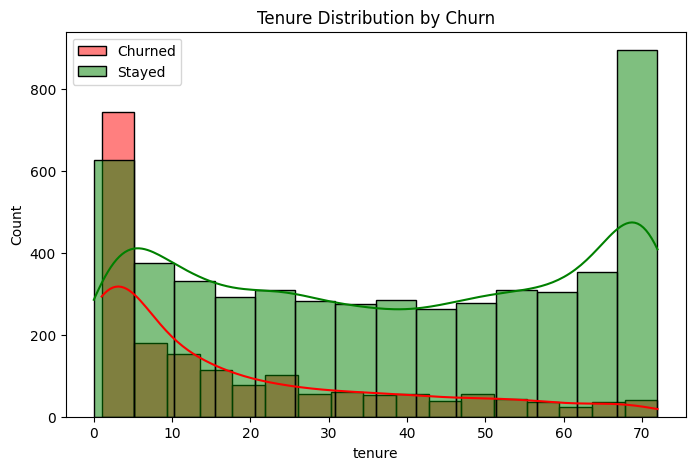

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Churn']==1]['tenure'], color="red", kde=True, label="Churned")
sns.histplot(df[df['Churn']==0]['tenure'], color="green", kde=True, label="Stayed")
plt.legend()
plt.title("Tenure Distribution by Churn")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Results
[[924 111]
 [165 209]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results
[[925 110]
 [184 190]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
!pip install shap
import shap


In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)


In [ ]:
shap.summary_plot(shap_values[1], X_test)  # 1 = churn class


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
shap.summary_plot(shap_values[1], X_test.values, feature_names=X_test.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

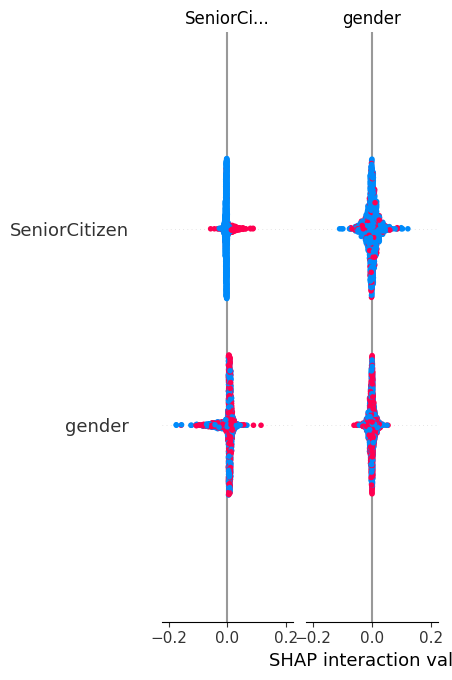

In [ ]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test.to_numpy())

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [ ]:
explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

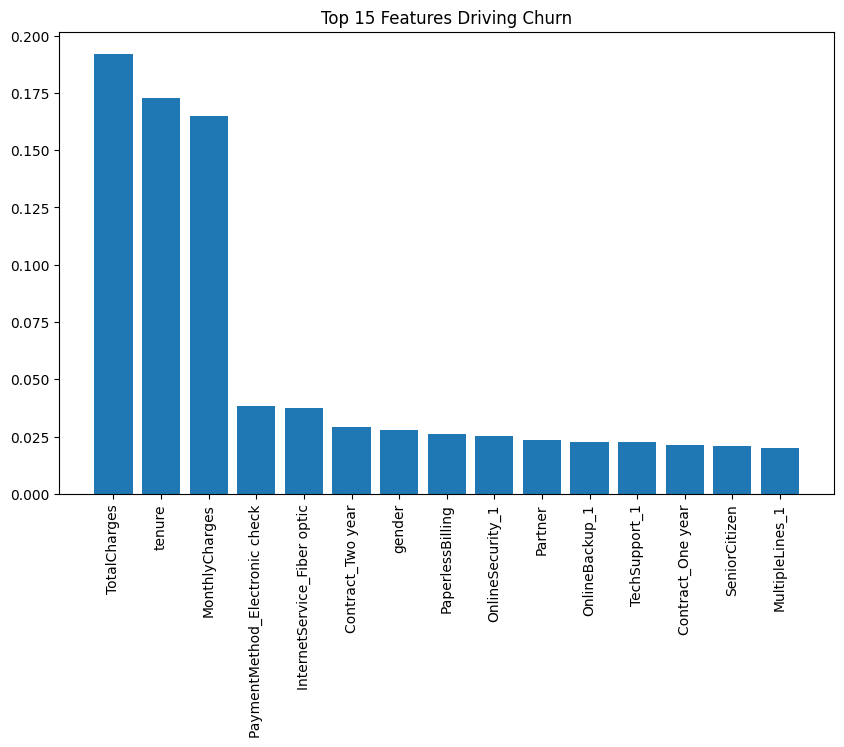

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.title("Top 15 Features Driving Churn")
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), [X.columns[i] for i in indices[:15]], rotation=90)
plt.show()


In [ ]:
# Full cleaned dataset
df.to_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv", index=False)

# Predictions with actual churn
df_results = X_test.copy()
df_results["Actual_Churn"] = y_test.values
df_results["Predicted_Churn"] = y_pred_rf
df_results.to_csv("telecom_results.csv", index=False)
